In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
mental_df = pd.read_csv("Resources/mental.csv")
vote_count = pd.read_csv("Resources/2020_vote.csv")
vote_mental = pd.merge(mental_df,vote_count,how="left",on="State")
vote_mental["Time Period Start Date"]=pd.to_datetime(vote_mental["Time Period Start Date"])
vote_mental["Time Period End Date"]=pd.to_datetime(vote_mental["Time Period End Date"])

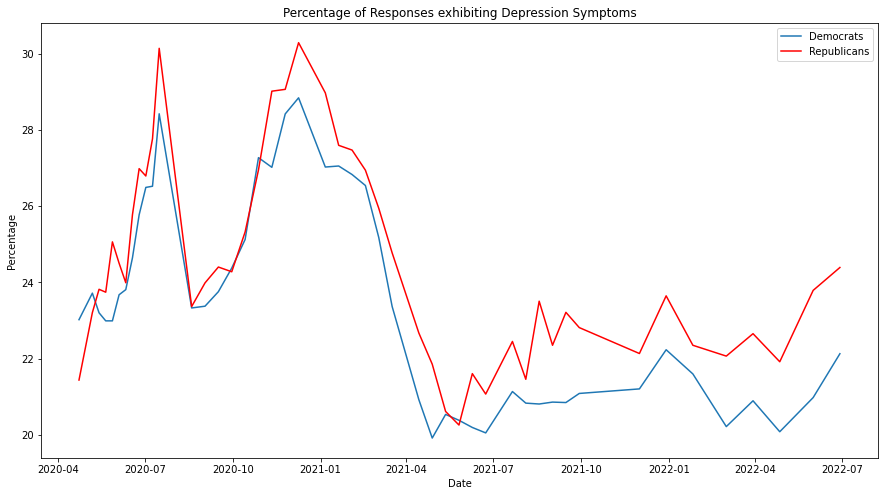

In [37]:
#Just Depression

depression = vote_mental.loc[(vote_mental["Group"] == "By State")& \
                             (vote_mental["Indicator"] == "Symptoms of Depressive Disorder"),:]

plt.figure(figsize=(15,8))
democrats_mental = pd.DataFrame(depression.loc[depression["called"]=="D",:].groupby("Time Period Start Date").mean() \
["Value"]).reset_index(drop=False).sort_values("Time Period Start Date")
republicans_mental = depression.loc[depression["called"]=="R",:].groupby("Time Period Start Date").mean() \
["Value"].reset_index(drop=False).sort_values("Time Period Start Date")
plt.plot(democrats_mental["Time Period Start Date"],democrats_mental["Value"])
plt.plot(republicans_mental["Time Period Start Date"],republicans_mental["Value"],color="red")
# republicans_mental.plot(x="Time Period Start Date",y="Value")
# democrats_mental.plot(x="Time Period Start Date",y="Value")
plt.legend(["Democrats","Republicans"],loc="best")
plt.title("Percentage of Responses exhibiting Depression Symptoms")
plt.ylabel("Percentage")
plt.xlabel("Date")
plt.show()

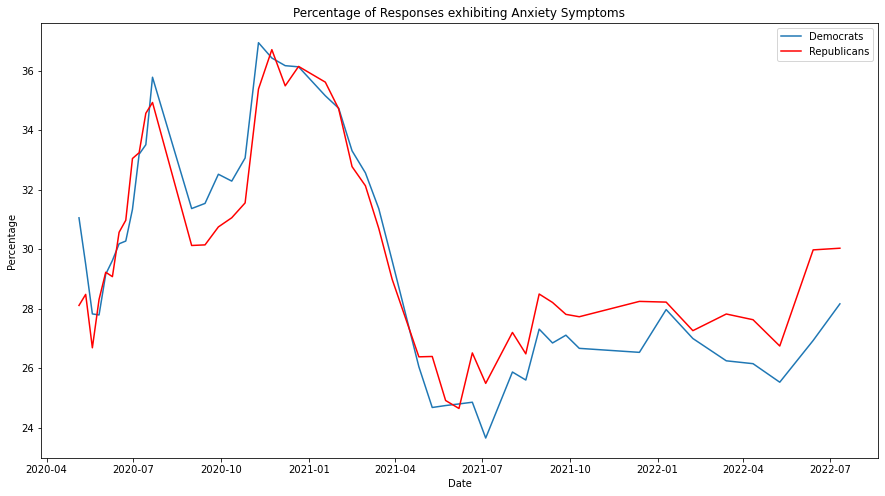

In [44]:
#Just Anxiety

anxiety=vote_mental.loc[(vote_mental["Group"] == "By State") \
                        &(vote_mental["Indicator"] == "Symptoms of Anxiety Disorder"),:]

plt.figure(figsize=(15,8))
democrats_mental = pd.DataFrame(anxiety.loc[anxiety["called"]=="D",:].groupby("Time Period End Date").mean() \
["Value"]).reset_index(drop=False).sort_values("Time Period End Date")
republicans_mental = anxiety.loc[anxiety["called"]=="R",:].groupby("Time Period End Date").mean() \
["Value"].reset_index(drop=False).sort_values("Time Period End Date")
plt.plot(democrats_mental["Time Period End Date"],democrats_mental["Value"])
plt.plot(republicans_mental["Time Period End Date"],republicans_mental["Value"],color="red")
# republicans_mental.plot(x="Time Period Start Date",y="Value")
# democrats_mental.plot(x="Time Period Start Date",y="Value")
plt.legend(["Democrats","Republicans"],loc="best")
plt.title("Percentage of Responses exhibiting Anxiety Symptoms")
plt.ylabel("Percentage")
plt.xlabel("Date")
plt.show()

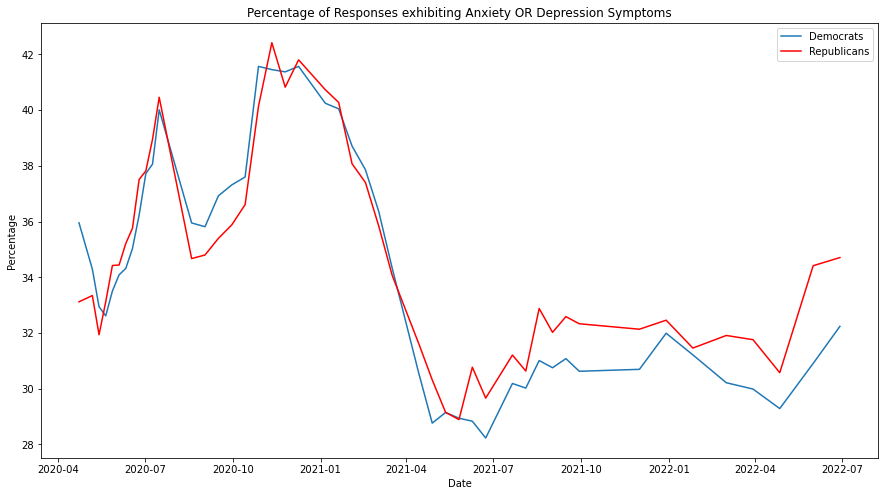

In [38]:
#anxiety_depression

anxiety_depression = vote_mental.loc[(vote_mental["Group"] == "By State") \
                                     &(vote_mental["Indicator"] == \
                                       "Symptoms of Anxiety Disorder or Depressive Disorder"),:]

plt.figure(figsize=(15,8))
democrats_mental = pd.DataFrame(anxiety_depression.loc[anxiety_depression["called"]=="D",:].groupby("Time Period Start Date").mean() \
["Value"]).reset_index(drop=False).sort_values("Time Period Start Date")
republicans_mental = anxiety_depression.loc[anxiety_depression["called"]=="R",:].groupby("Time Period Start Date").mean() \
["Value"].reset_index(drop=False).sort_values("Time Period Start Date")
plt.plot(democrats_mental["Time Period Start Date"],democrats_mental["Value"])
plt.plot(republicans_mental["Time Period Start Date"],republicans_mental["Value"],color="red")
# republicans_mental.plot(x="Time Period Start Date",y="Value")
# democrats_mental.plot(x="Time Period Start Date",y="Value")
plt.legend(["Democrats","Republicans"],loc="best")
plt.title("Percentage of Responses exhibiting Anxiety OR Depression Symptoms")
plt.ylabel("Percentage")
plt.xlabel("Date")
plt.show()

In [57]:
by_state = mental_df.loc[mental_df["Group"]=="By State",:]
popular_vote = pd.read_csv("Resources/Popular vote backend - Sheet1.csv")
margin_df = pd.merge(by_state,popular_vote,how="left",on="State")
margin_df["dem_votes"]=margin_df["dem_votes"].str.replace(",","").astype('float')
margin_df["rep_votes"]=margin_df["rep_votes"].str.replace(",","").astype('float')
margin_df.dtypes

Indicator                  object
Group                      object
State                      object
Subgroup                   object
Phase                      object
Time Period                 int64
Time Period Label          object
Time Period Start Date     object
Time Period End Date       object
Value                     float64
Low CI                    float64
High CI                   float64
Confidence Interval        object
Quartile Range             object
called                     object
final                      object
dem_votes                 float64
rep_votes                 float64
other_votes                object
dem_percent                object
rep_percent                object
other_percent              object
dem_this_margin            object
margin_shift               object
vote_change                object
stateid                    object
EV                        float64
X                         float64
Y                         float64
State_num     

In [59]:
margin_df["Margin"]=abs(margin_df["dem_votes"]-margin_df["rep_votes"])
margin_df.sort_values("Margin",ascending=False)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,...,EV,X,Y,State_num,Center_X,Center_Y,Unnamed: 19,2016 Margin,Total 2016 Votes,Margin
635,Symptoms of Anxiety Disorder or Depressive Dis...,By State,California,California,3 (Jan 6 � Mar 29),24,"Feb 3 - Feb 15, 2021",2/3/2021,2/15/2021,42.1,...,55.0,1.0,3.0,6.0,75.0,283.0,NaN,0.301093,"14,181,595",5103821.0
661,Symptoms of Anxiety Disorder,By State,California,California,3.1,33,"Jun 23 - Jul 5, 2021",6/23/2021,7/5/2021,24.7,...,55.0,1.0,3.0,6.0,75.0,283.0,NaN,0.301093,"14,181,595",5103821.0
655,Symptoms of Anxiety Disorder,By State,California,California,3.1,31,"May 26 - Jun 7, 2021",5/26/2021,6/7/2021,26.5,...,55.0,1.0,3.0,6.0,75.0,283.0,NaN,0.301093,"14,181,595",5103821.0
656,Symptoms of Anxiety Disorder or Depressive Dis...,By State,California,California,3.1,31,"May 26 - Jun 7, 2021",5/26/2021,6/7/2021,30.7,...,55.0,1.0,3.0,6.0,75.0,283.0,NaN,0.301093,"14,181,595",5103821.0
657,Symptoms of Depressive Disorder,By State,California,California,3.1,32,"Jun 9 - Jun 21, 2021",6/9/2021,6/21/2021,21.7,...,55.0,1.0,3.0,6.0,75.0,283.0,NaN,0.301093,"14,181,595",5103821.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,Symptoms of Depressive Disorder,By State,Arizona,Arizona,2,13,"Aug 19 - Aug 31, 2020",8/19/2020,8/31/2020,26.4,...,11.0,2.0,2.0,4.0,205.0,374.0,NaN,-0.035456,"2,573,165",10457.0
317,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Arizona,Arizona,1,12,"July 16 - July 21, 2020",7/16/2020,7/21/2020,44.9,...,11.0,2.0,2.0,4.0,205.0,374.0,NaN,-0.035456,"2,573,165",10457.0
316,Symptoms of Anxiety Disorder,By State,Arizona,Arizona,1,12,"July 16 - July 21, 2020",7/16/2020,7/21/2020,41.3,...,11.0,2.0,2.0,4.0,205.0,374.0,NaN,-0.035456,"2,573,165",10457.0
315,Symptoms of Depressive Disorder,By State,Arizona,Arizona,1,12,"July 16 - July 21, 2020",7/16/2020,7/21/2020,34.3,...,11.0,2.0,2.0,4.0,205.0,374.0,NaN,-0.035456,"2,573,165",10457.0


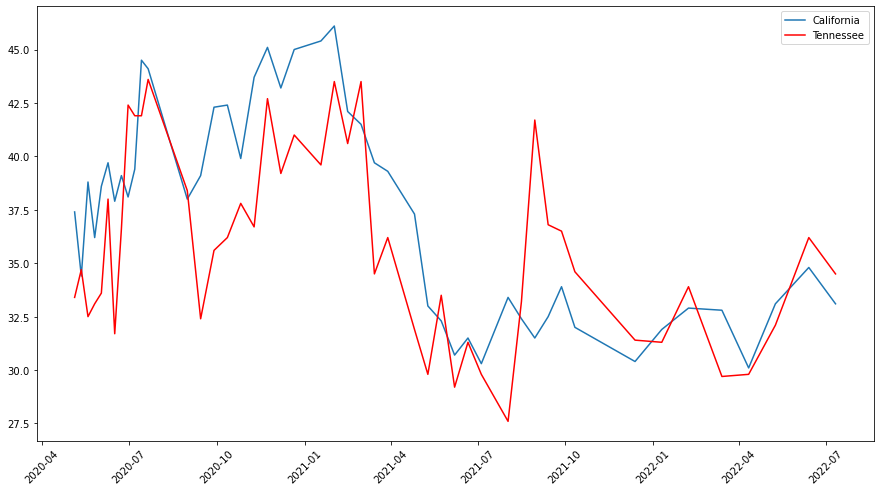

In [92]:
#Largest Margin between Democratic and Repbulican States: 
# California had the largest margin that voted Democrat 
# Tennessee has the largest margin that voted Republican
# Plotting for CA and TN on Anxiety or Depression Indicator
ca_df = anxiety_depression.loc[anxiety_depression["State"]=="California",:]
tn_df =anxiety_depression.loc[anxiety_depression["State"]=="Tennessee",:]
# ca_df.plot("Time Period End Date","Value",label="California")
# tn_df.plot("Time Period End Date","Value",label="Tennessee")

plt.figure(figsize=(15,8))
plt.plot(ca_df["Time Period End Date"],ca_df["Value"],label="California")
plt.plot(tn_df["Time Period End Date"],tn_df["Value"],color="red",label="Tennessee")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()